### Assume I have a canny edge image. I want to crop so the subject is as big as possible

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load an example of canny image from 
DATASET_DIR = "/home/athiwat/progressive_img2sketch/resources/LOD50_Finer_orbit_processed/canny_images"
example_canny_image = "/home/athiwat/progressive_img2sketch/resources/LOD50_Finer_orbit_processed/canny_images/14/lod2_az030_el30.png"

# load the canny image
canny_image = cv2.imread(example_canny_image, cv2.IMREAD_UNCHANGED)
canny_image.shape

(1718, 1730)

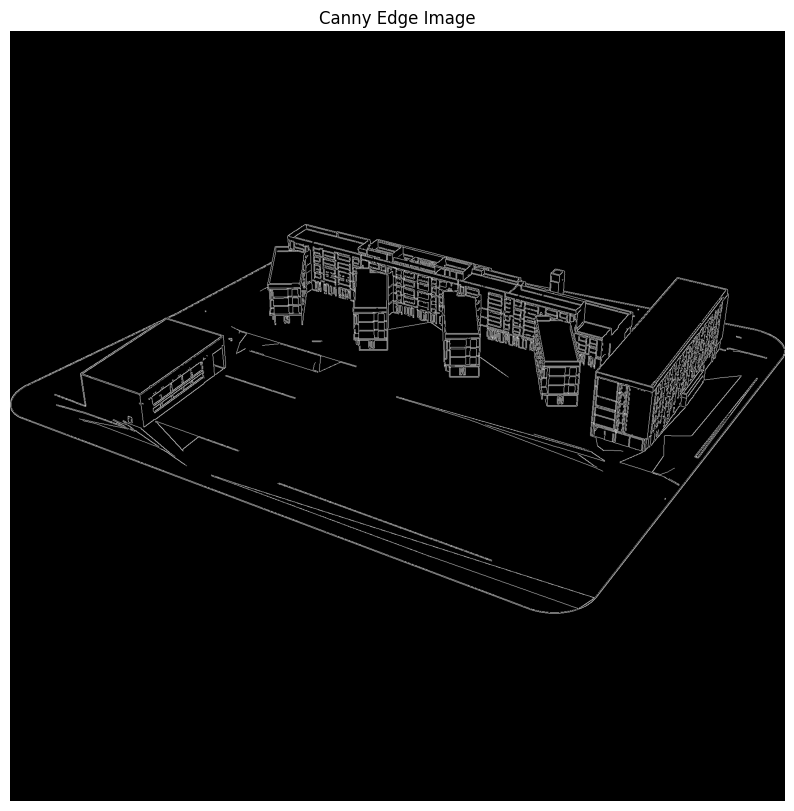

In [2]:
plt.figure(figsize=(10, 10))
plt.imshow(canny_image, cmap='gray')
plt.axis('off')
plt.title("Canny Edge Image")
plt.show()


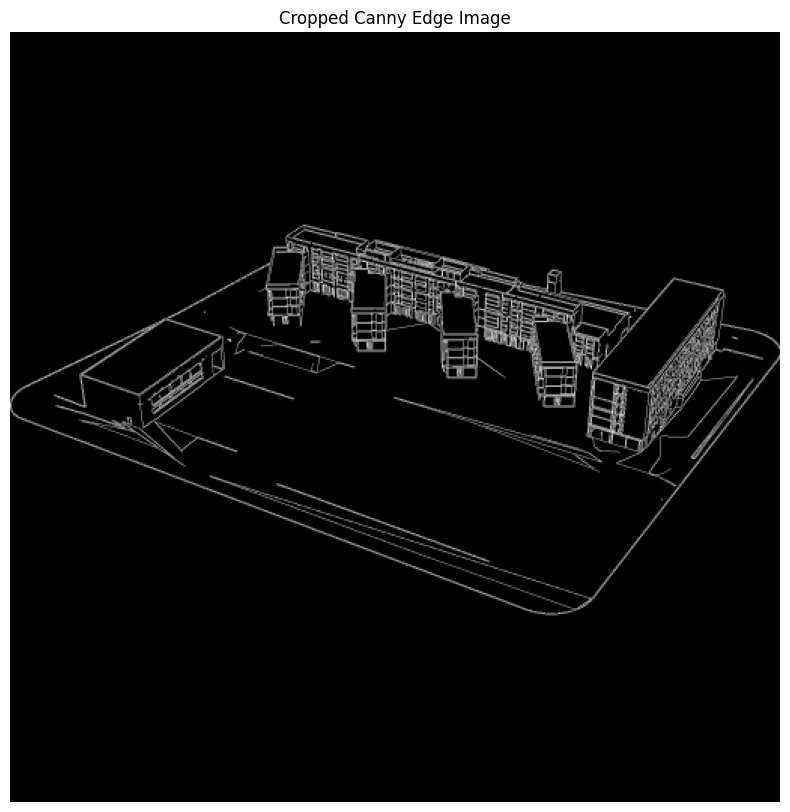

In [3]:
# calculate the bounding box of the canny image (the area where the canny image is not zero) 
non_zero_points = np.argwhere(canny_image > 0)
# then crop the bbox to be 1:1 aspect ratio containing the all non-zero points in both x and y axis
min_y, min_x = np.min(non_zero_points, axis=0)
max_y, max_x = np.max(non_zero_points, axis=0)
bbox_height = max_y - min_y
bbox_width = max_x - min_x
# calculate the center of the bbox
center_y = (min_y + max_y) // 2
center_x = (min_x + max_x) // 2
# calculate the size of the bbox to be 1:1 aspect ratio
bbox_size = max(bbox_height, bbox_width)
# calculate the new min and max points of the bbox
new_min_y = center_y - bbox_size // 2
new_min_x = center_x - bbox_size // 2
new_max_y = center_y + bbox_size // 2
new_max_x = center_x + bbox_size // 2

# then crop the canny image to the new bbox
cropped_canny_image = canny_image[new_min_y:new_max_y, new_min_x:new_max_x]

# resize the cropped image to 512x512
cropped_canny_image = cv2.resize(cropped_canny_image, (512, 512), interpolation=cv2.INTER_AREA) 

plt.figure(figsize=(10, 10))
plt.imshow(cropped_canny_image, cmap='gray')
plt.axis('off')
plt.title("Cropped Canny Edge Image")
plt.show()

In [4]:
# # do this to all canny images in the dataset directory scene number are from 0 to 50 inclusive
# for scene_num in range(51):
#     scene_dir = os.path.join(DATASET_DIR, str(scene_num))
#     if not os.path.exists(scene_dir):
#         continue
#     for file_name in os.listdir(scene_dir):
#         if file_name.endswith(".png"):
#             canny_image_path = os.path.join(scene_dir, file_name)
#             canny_image = cv2.imread(canny_image_path, cv2.IMREAD_UNCHANGED)
#             canny_image = cv2.cvtColor(canny_image, cv2.COLOR_BGR2GRAY)
#             non_zero_points = np.argwhere(canny_image > 0)
#             if non_zero_points.size == 0:
#                 continue
#             min_y, min_x = np.min(non_zero_points, axis=0)
#             max_y, max_x = np.max(non_zero_points, axis=0)
#             bbox_height = max_y - min_y
#             bbox_width = max_x - min_x
#             center_y = (min_y + max_y) // 2
#             center_x = (min_x + max_x) // 2
#             bbox_size = max(bbox_height, bbox_width)
#             new_min_y = center_y - bbox_size // 2
#             new_min_x = center_x - bbox_size // 2
#             new_max_y = center_y + bbox_size // 2
#             new_max_x = center_x + bbox_size // 2
#             cropped_canny_image = canny_image[new_min_y:new_max_y, new_min_x:new_max_x]
#             cv2.imwrite(canny_image_path, cropped_canny_image)